In [26]:
from langgraph.graph import StateGraph, START , END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os

In [29]:
load_dotenv()

True

In [30]:
model = ChatGroq(model="llama-3.1-70b-versatile",api_key=os.getenv("GROQ_API_KEY"))
res = model.invoke("hii")
print(res.content)

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}

In [20]:
class llm(TypedDict):
    question :str
    answer : str

In [4]:
def llm(state : llm) -> llm:
    model = Groq(api_key = api_key , temperature = 0, model_name = llama_2)
    q = llm['question']
    ans = model.invoke(q)
    llm['answer'] = ans.content


    return state


In [8]:
graph = StateGraph(llm)

graph.add_node('model' , llm)

graph.add_edge(START , 'model')
graph.add_edge('model' , END)

workflow = graph.compile()

d:\LANGGRAPH_CAMPUSX\LangGraph_tutorial\myenv\Lib\site-packages\langgraph\graph\state.py:103: UserWarning: Invalid state_schema: <function llm at 0x0000027060AEC720>. Expected a type or Annotated[type, reducer]. Please provide a valid schema to ensure correct updates.
 See: https://langchain-ai.github.io/langgraph/reference/graphs/#stategraph
  warnings.warn(


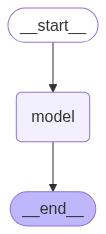

In [10]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())